Graded Challenge3 

Nama : Maulana Achsan 

Batch : RMT - 35


Program ini dibuat untuk membersihkan data yang berasal dari tokopedia dan telah berhasil scraping oleh program lain dan di import ke program ini. Program ini berguna untuk membersihkan data tersebut serta berusaha menganalisis data itu. Selanjutnya hasil analisis dari data itu akan membantu pebisnis untuk mengambil keputusan terbaik berdasarkan data yang telah kita peroleh. 

# Program Lain Untuk Scraping di Tokopedia dan Menyimpan Sebagai csv file
```py  
""" jadi program ini akan mengambil data dari tokopedia sebanyak 10 halaman dan akan memisahkan produk yang memang diiklankan oleh tokopedia. Program ini juga akan otomatis mengganti missing value pada website misalkan pada data terjual atau rating dengan value None untuk memudahkan kita. """

#Importing library yang dibutuhkan

from bs4 import BeautifulSoup           # library mempercantik html dari sebaris jadi bisa untuk dibaca
from selenium import webdriver          # library webdriver
from time import sleep                  # library untuk kode tidak terlalu cepat ganti page
import pandas as pd                     # library untuk penataan dataframe


""" list kosong untuk menampung hasil scraping setiap value, karena hasil scraping harus di tampung di tempat dulu sebelum di 
kirim untuk dijadikan df. biasanya di gunakan untuk pengecekan apakah panjang variabel sudah sama. """

#Daftar List Kosong
nama_barang= []
harga_barang= []
nama_toko = []
kota_toko = []
terjual = []
rating_toko = []


# pambuatan dataframe untuk nampung hasil 
df=pd.DataFrame()


#instance Driver (pemakaian objek untuk memanggil fungsi / class / method di selenium)
driver = webdriver.Chrome()

""" pada awalnya kita akan looping 10 page pada halaman url. kita mencoba mengetahui pattern dengan membuka page ke-2 sehingga kita bisa tahu pola nya dan bisa kita looping dengan menggunakan itu biasanya formatnya di page= seperti yang terlihat pada url bawah ini."""
for i in range(1,11):
    # nunjukin akan ngambil data dari link mana
    url="https://www.tokopedia.com/search?page={}&q=seblak&search_id=202408230011197B9C09C920D16A129YHT&source=universe&srp_component_id=02.07.01.01&st=product".format(i)
    #nyuruh driver untuk akses tautannya
    driver.get(url)
    # blok ini untuk menunggu 3 detik sebelum kode dilanjutkan. untuk menghindari terlalu cepat ke block selanjutnya
    sleep(3)

    # blok kode auto scroll untuk menghindari lazy loading pada website-website anti scraping. Sehingga ketika kita dapat data, posisi kita sudah mencapai bawah dari web html sehingga kita mendapat data semua dari 1 halaman tanpa ada missing value atau data yang tidak terload sempurna.  
    #blok auto scroll
    for scroll in range(15):
        driver.execute_script("window.scrollBy(0,350)") #sekali scroll 350 pixel
        #menunggu 1 detik sebelum iterasi selanjutnya
        sleep(1)

    # in untuk melakukan scraping htmlnya. ini dilakukan setelah posisi scrolling biasanya di bawah
    html = driver.page_source
    
    # mempercantik tampilan supaya tidak sebaris
    soup = BeautifulSoup(html, "html.parser")
    
    ''' penjelasan untuk 6 looping di bawah
    untuk membedakan antara iklan dan iklan maka kita akan mengambil dari kontainer pada produk yang tidak iklan untuk menghindari pengambilan data yang ada iklannya.dari kontainer itu kita akan cari class yang akan kita cari dan kemudian akan langsung memasukkan hasil ke dalam list jika ada. elemen tersebut ternyata kadang tidak ditemukan maka saya menghandle nya dengan memasukkan none pada list sehingga setiap baris itu akan sama tanpa ada missing value atau kelebihan values pada list tampungan. '''
    # penjelasan kurang lebih sama dengan 6 looping ini namun beda hanya di class nya saja. 

    # looping untuk nama barang 

    # looping kontainer tag html
    for i in soup.find_all('div',{"class":"css-5wh65g"}):
        # looping untuk mencari kelas yang diinginkan pada kontainer
        elemen1 = i.find('div',{"class":"VKNwBTYQmj8+cxNrCQBD6g=="}) 
        #kondisional jika ga ada maka masukkan none.
        if elemen1 == None : 
            nama_barang.append(None)
        else : 
            #ditakutkan ternyata ada classnya dan isinya ("") maka kita juga kasih kondisional dengan variabel baru yang posisi variabel elemen sudah terhapus semua spasi kosong2nya.
            text = elemen1.get_text().strip()
            if text == '':
                #memasukkan ke list namabarang sebagai none
                nama_barang.append(None)
            else:
                #ketika data ada maka beneran text dimasukkan ke list nama barang.
                nama_barang.append(text)
    

    # blok kode untuk harga barang. kemungkinan beda variabel dan nama class namun secara kodingan dan explanation sama seprti di atas 
    for i in soup.find_all('div',{"class":"css-5wh65g"}):
        elemen1 = i.find ('div',{"class":"ELhJqP-Bfiud3i5eBR8NWg=="}) 
        if elemen1 == None : 
            harga_barang.append(None)
        else : 
            text = elemen1.get_text().strip()
            if text == '':
                harga_barang.append(None)
            else:
                harga_barang.append(text) 
    
    # blok kode untuk nama toko. kemungkinan beda variabel dan nama class namun secara kodingan dan explanation sama seprti di atas 
    for i in soup.find_all('div',{"class":"css-5wh65g"}):
        elemen1 =  i.find('span',{"class":"X6c-fdwuofj6zGvLKVUaNQ== -9tiTbQgmU1vCjykywQqvA== flip"}) 
        if elemen1 == None : 
            nama_toko.append(None)
        else : 
            text = elemen1.get_text().strip()
            if text == '':
                nama_toko.append(None)
            else:
                nama_toko.append(text) 

    ## blok kode untuk nama toko. kemungkinan beda variabel dan nama class namun secara kodingan dan explanation sama seprti di atas

    for i in soup.find_all('div',{"class":"css-5wh65g"}):
        elemen1 = i.find ('span',{"class":"-9tiTbQgmU1vCjykywQqvA== flip"}) 
        if elemen1 == None : 
            kota_toko.append(None)
        else : 
            text = elemen1.get_text().strip()
            if text == '':
                kota_toko.append(None)
            else:
                kota_toko.append(text) 

    # # blok kode untuk list terjual. kemungkinan beda variabel dan nama class namun secara kodingan dan explanation sama seprti di atas 

    for i in soup.find_all('div',{"class":"css-5wh65g"}):
        sold = i.find('span',{"class":"eLOomHl6J3IWAcdRU8M08A=="})  
        if sold is None:
            terjual.append(None)
        else:
            text = sold.get_text().strip()
            # Jika teks kosong, tambahkan '0'
            if text == '':
                terjual.append(None)
            else:
                terjual.append(text)

    ## blok kode untuk rating. kemungkinan beda variabel dan nama class namun secara kodingan dan explanation sama seprti di atas
    
    for i in soup.find_all('div', {"class": "css-5wh65g"}):
    # Cari elemen dengan class tertentu di dalam setiap kontainer
        rating_elem = i.find('span', {"class": "nBBbPk9MrELbIUbobepKbQ=="})
        
        # Jika elemen tidak ditemukan, tambahkan none
        if rating_elem is None:
            rating_toko.append(None)
        else:
            text = rating_elem.get_text().strip()
            # Jika teks kosong, tambahkan none
            if text == '':
                rating_toko.append(None)
            else:
                rating_toko.append(text)

# memasukkan list (namabarang,hargabarang, nama toko, kota toko , jumlah terjual dan rating toko ke dalam df.)
# sebagai catatan jika jumlah tidak sama maka perlu dicek dulu menggunakan len(namavariabel) setiap list2 tersebut. 

#proses memasukkan setiap kolom
# nama produk        
df['nama_produk'] = nama_barang
# harga
df['harga']= harga_barang
# nama toko
df['nama_toko'] = nama_toko
#kota
df['kota'] =kota_toko
#terjual
df['terjual'] = terjual
#rating toko
df['rating'] = rating_toko

# importing file menjadi csv
df.to_csv("hasil.csv",index=False)
 ```

In [275]:
# importing library yang dibutuhkan untuk kodingan kali ini
# pandass numpy dan scipy. numpy kemungkinan tidak digunakan tapi kita persiapkan dulu saja
import pandas as pd 
import numpy as np 


# Intro
Sebelum kita memasuki proses importing data maka kita akan membuat short summary mengenai apa yang akan kita lakukan disini. Kita sudah mendapatkan data dari 10 halaman tokopedia dengan kata kunci seblak. Dari data ini kita akan berusaha untuk mendapatkan insight dari data itu. Saya sebagai data analis lulusan hacktiv 8 akan menambah penghasilan dengan berjualan dropship dengan partner bisnis kita. Maka kita akan mendapatkan info-info penting untuk jualan saya. Dikarenakan saya ini akan jualan seblak online maka kita harus sesuai dengan permintaan pasar dan posisi pasar kita nantinya, dengan ini kita mendapatkan gambaran yang cocok dari pasar yang akan kita masuki. Usaha saya akan menjadi masuk akal karena dibacking oleh data driven decision. Pengambilan data dari tokped ini akan sangat cocok sekali karena kita akan berfokus pada penjualan online terlebih dahulu. Perlu diingat data ini diambil pada hari jumat 23 Agustus 2024 sehingga bisa dipertimbangkan penggunaan data ini karena data di tokopedia sendiri bersifat dinamis dan berganti ganti terus setiap waktu karena itu diposting oleh user penjual, user pembeli dan tokopedia untuk item iklan.

Importing data ke notebook ini menggunakan library pandas untuk pembacaan csv file 

In [276]:
# importing data ke notebook ini 
df=pd.read_csv(r"C:\Users\asanm\Hacktiv8\Phase0\Week3\gc3\hasil.csv")
# menampilkan 50 data untuk dilihat bentukan datanya
df.sample(10)

,nama_produk,harga,nama_toko,kota,terjual,rating
496,Seblak Instan Murah,Rp3.000,Pawon Berkahh,Kab. Demak,NaN,NaN
472,seblak kuah mamang rafael instant pedas sunda,Rp35.000,Aisyah Ayesha,Jakarta Selatan,2 terjual,4.0
103,"baso aci, bakso aci, cuanki, seblak instan, boci",Rp8.000,baso aci masabi,Jakarta Selatan,2rb+ terjual,4.8
566,Seblak instan enak dan kenyang,Rp6.000,tutikch_14,Kab. Jombang,4 terjual,5.0
203,Seblak Mamang Rafael,Rp33.000,Ice Cream Universe,Denpasar,9 terjual,NaN
362,kerupuk seblak kering pedas 1 kg keripik hot s...,Rp41.000,JAGO TOK PETOK,Surabaya,100+ terjual,4.9
197,siomay mini kering 250 gram toping seblak baso...,Rp7.999,CUANKI CULAMETAN,Kab. Garut,250+ terjual,4.9
190,Seblak Mommy,Rp13.900Rp15.000,Gerai Snack Official Shop,Kab. Tangerang,2rb+ terjual,4.6
545,Seblak Cireng Boboko Snack Camilan Pedas Kuah ...,Rp17.000,tanganibu id,Kab. Tulungagung,1 terjual,5.0
315,Krupuk stik seblak 250gram,Rp10.000,Kikijaya snack bogor,Bogor,24 terjual,4.9


Setelah kita mengimpor data, kita mencoba untuk eksplorasi data terlebih dahulu sample 10 dari data ini jadi kita bisa mengetahui gambaran data kita. Data ini terlihat cukup bersih namun masih ada ketidaksesuaian pada kolom harga. pada kolom harga sepertinya ada values yang memiliki double harga, setelah di cross check di website ternyata memang datanya seperti itu, dikarenakan value pertama pada doble values itu adalah harga diskon dan value kedua merupakan harga asli(harga sebelum diskon). Untuk nama produk dan nama toko biarkan seperti itu saja karena itu memang unik dan inputan user, dan pada terjual masih ada 500 + terjual atau 1rb terjual. Penggunaan bahasa ini kurang di pahami oleh mesin jadi perlu dihandling. 

In [277]:
#Penampilan Kolom 
df.columns
# kemungkinan digunakan untuk looping nantinya dan pengecekan apakah ada aneh aneh pada kolom
# ini harusnya aman karena pada data frame yang di import kita sendiri yang memberikan penamaan namun perlu dicek ulang

Index(['nama_produk', 'harga', 'nama_toko', 'kota', 'terjual', 'rating'], dtype='object')

penamaan kolom clear tak perlu dihandling.

In [278]:
#cek jumlah kolom dan baris 
df.shape

(808, 6)

data ini memiliki 808 baris dan 6 kolom. data cukup banyak seharusnya cukup untuk menggambarkan mayoritas pembeli di tokopedia. 

In [279]:
#menghitung jumlah null value 
df.isna().sum()

nama_produk     0
harga           0
nama_toko       0
kota            0
terjual        25
rating         63
dtype: int64

Seperti ditemukan diatas ditemukan 25 values kosong pada kolom terjual dan 63 values kosong pada kolom rating. Beberapa kasus data null values dihilangkan dan ada yang dipertahankan maka kita coba lihat dulu seperti apa bentukannya baris dan kolom-kolom missing values apakah setimpal(worth) untuk tidak dipakai atau lebih baik dipakai.

In [280]:
df[df.isna().any(axis=1)]


,nama_produk,harga,nama_toko,kota,terjual,rating
83,Cemilan Snack Kekinian | varian Kerupuk Seblak...,Rp8.000,SNACK TIMEE,Medan,NaN,NaN
84,Cemilan Snack Krupuk Seblak Pedas Bawang Kencu...,Rp8.500,Toko Jajan Murah Online,Surabaya,NaN,NaN
85,Kerupuk seblak mentah/kerupuk ikan udang/kerup...,Rp7.500,Ambar rempah,Tangerang Selatan,NaN,NaN
96,kerupuk seblak ALN2 kemasan 100 gr,Rp12.000,grosir sembako Aln2,Kab. Bandung Barat,NaN,NaN
97,PROMO KEMERDEKAAN SEBLAK + KRISANG 200 GR,Rp79.000,Central Seblak Nusantara,Tangerang Selatan,NaN,NaN
...,...,...,...,...,...,...
751,Kerupuk seblak pedas 500 Grm / kerupuk seblak ...,Rp22.500,adistri snack,Kab.Ciamis,1 terjual,NaN
783,Pilus kencur pilus cikur 1 kg toping seblak ba...,Rp30.000,WaroenkDjajan,Kab. Sukabumi,1 terjual,NaN
786,CIRENG SALJU KUAH SEBLAK,Rp11.000,MJJ303,Kab. Mojokerto,7 terjual,NaN
796,MIE SEBLAK MURAH ENAK MANTAP MAKNYUSS,Rp13.999,dhioshopi,Denpasar,NaN,NaN


dari tampilan data yang missing values memang data ini tidak worth untuk tidak dipakai karena masih mengandung informasi seperti kota dan harga. kota dan harga harusnya bisa sebagai pertimbangan kita untuk jualan online di marketplace ini. 

In [281]:
#Pengecekan data duplikasi
df.duplicated().sum()

83

data masih terdapat duplikasi apakah ini beneran duplikasi yang atas bawah sama semua atau bagaimana ya kita harus lihat bentukannya dulu

In [282]:
# Menampilkan hanya baris-baris yang merupakan duplikat dan 2 baris yang sama duplikat akan terlihat
df[df.duplicated(keep=False)].iloc[70:80]


,nama_produk,harga,nama_toko,kota,terjual,rating
235,cuanki lidah 150 pcs toping seblak baso aci,Rp35.111Rp35.999,CUANKI CULAMETAN,Kab. Garut,500+ terjual,4.9
239,Kylafood Seblak Kwetiaw play,Rp21.150Rp23.500,kylafood,Bandung,500+ terjual,4.9
250,Seblak Hot Spicy By Bapper Food / Seblak Insta...,Rp19.110Rp21.000,Foodstocks,Jakarta Selatan,100+ terjual,5.0
251,cuanki tahu gepeng isi 50 pcs toping seblak ba...,Rp19.500,CUANKI CULAMETAN,Kab. Garut,100+ terjual,4.9
253,Kylafood Seblak Rempah Autentik Isi (24pcs),Rp294.120Rp309.600,kylafood,Bandung,14 terjual,5.0
254,cuanki lidah asli garut isi 150 pcs,Rp32.500,kira3arut,Kab. Garut,10rb+ terjual,4.9
255,cuanki lidah asli garut isi 150 pcs,Rp32.500,kira3arut,Kab. Garut,10rb+ terjual,4.9
258,BUMBU BASO ACI SEBLAK 100gr,Rp12.000,jajanangarut19,Jakarta Selatan,250+ terjual,4.9
269,Seblak Instant Basranger Extra Pedas Daun Jeru...,Rp19.700Rp30.000,Gerai Snack Official Shop,Kab. Tangerang,100+ terjual,4.9
273,Kylafood Mix Pentol Kuah dan Seblak Original,Rp42.500Rp50.000,kylafood,Bandung,60+ terjual,4.9


data memang benar benar terduplikat atas bawah seperti index nomor 254 dan 255 dan ini perlu dibuang saja dari dataframe karena data duplikat bisa saja merubah hasil akhir analisis kita. Mengapa ini terjadi? sepertinya itu karena itu adalah produk iklan(produk yang diiklankan oleh tokped) dengan membayar dan ditandai dengan ada tulisan ad pada gambarnya. jadi tokopedia bisa menaruh dan menduplikasi produk itu dimanapun dan sesukanya. karena emang itu monetize nya mereka (tokopedia). 

setelah melihat bentukan dari duplikasi kita melihat datatype dari setiap kolom dahulu

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nama_produk  808 non-null    object 
 1   harga        808 non-null    object 
 2   nama_toko    808 non-null    object 
 3   kota         808 non-null    object 
 4   terjual      783 non-null    object 
 5   rating       745 non-null    float64
dtypes: float64(1), object(5)
memory usage: 38.0+ KB


data type masih banyak yang salah. contoh pada harga harusnya berbentuk float atau integer. pada terjual harusnya juga berbentuk integer ini harus dihandling. 

#### Kesimpulan Eksplorasi

Data ini sudah mantap oke dan bisa dipakai namun harus dibersihkan dan dihandle. 
1. Pembersihan kolom kolom yang memiliki pengotor seperti simbol rp dan tulisan tulisan mempermudah seperti rb + dan lain lain
2. Handling missing value tidak perlu dilakukan karena memang itu natural dari sana karena memang toko itu baru saja dibuat atau seller baru
3. Handling duplikasi data tidak usah dipakai dan keep 1 
4. Penggantian Type Data menjadi sesuai yang komputer/mesin/device harapkan. Bilangan harus data bilangan kalimat harus sesuai datatype kalimat. 

# Data Cleaning 

### Pembersihan Kolom dari Values Tak Diinginkan

In [284]:
#slicing 50 data dari indeks 50 sampai 100
df.iloc[50:100]

,nama_produk,harga,nama_toko,kota,terjual,rating
50,Makaroni bantet pedas daun jeruk 1kg makroni b...,Rp14.960,camilanqu_shop,Kab. Majalengka,26 terjual,4.7
51,seblak instant sajodo snak,Rp18.950,hikmah berkah jaya,Jakarta Barat,1rb+ terjual,4.9
52,seblak instant komplit bumbu cikruh bandung au...,Rp6.800,AUFARO SNACK,Kab. Bandung Barat,500+ terjual,4.9
53,paket mix 12PCS boci cuanki seblak,Rp38.999,nayismail,Cimahi,50+ terjual,4.9
54,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,Rp14.000,Distributor Cuanki dan Seblak,Kab. Bekasi,750+ terjual,4.9
55,Seblak pedas kerupuk pedas kiloan 1 kg,Rp35.000,RIKI STORE 97,Kab. Bogor,100+ terjual,4.7
56,3 SEBLAK FREE BASO ACI,Rp61.583Rp90.000,Sajodo Snack & Food,Tasikmalaya,100+ terjual,4.9
57,GURILEM MINI 1KG Siomay Kering Toping Baso Aci...,Rp29.000,Pedas Gilaa,Surabaya,1rb+ terjual,4.9
58,Agen Seblak Mommy,Rp9.999,Kenal Jaya Bandung,Bandung,4rb+ terjual,4.9
59,SEBLAK INSTAN NGABRET BANDUNG - SURABAYA SEBLA...,Rp5.048Rp5.099,Uai Food,Surabaya,50+ terjual,4.5


Ini kita mulai dari kolom harga dulu. Dari slicing 50 data kita ditemukan ada data mempunyai 2 harga. Logikanya ini adalah harga diskon dan sebelum diskon ya. jadi ini kita harus bersihkan dan ambil data setelah diskon. data setelah diskon ada di awal sebagai informasi. ini kenapa kita hapus harga asli(harga sebelum diskon) karena itu harga user tidak akan dapatkan. jadi harga yang akan di dapatkan oleh user adalah harga setelah diskon. 

In [285]:
# pemakaian split untuk splitting dan memakai rp sebagai splitter setelah itu data list dipilih nomor 1 sehingga dapat angka rupiah
df['harga'] = df['harga'].str.split('Rp').str[1]
# penggantian "." menjadi kosong karena dalam data frame atau bahasa mesin untuk penghitungan tak butuh titik.
df['harga'] = df['harga'].str.replace('.','')
# cek sampel data
df.iloc[50:55]

,nama_produk,harga,nama_toko,kota,terjual,rating
50,Makaroni bantet pedas daun jeruk 1kg makroni b...,14960,camilanqu_shop,Kab. Majalengka,26 terjual,4.7
51,seblak instant sajodo snak,18950,hikmah berkah jaya,Jakarta Barat,1rb+ terjual,4.9
52,seblak instant komplit bumbu cikruh bandung au...,6800,AUFARO SNACK,Kab. Bandung Barat,500+ terjual,4.9
53,paket mix 12PCS boci cuanki seblak,38999,nayismail,Cimahi,50+ terjual,4.9
54,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,14000,Distributor Cuanki dan Seblak,Kab. Bekasi,750+ terjual,4.9


data kolom harga sudah oke tinggal ganti type ke integer. bisa dilihat harga sudah menjadi seragam tanpa titik dan tanpa simbol Rp

In [286]:
#penggantian type data
df['harga']=df['harga'].astype(int)
#cek type data
df['harga'].dtype

dtype('int32')

data harga sudah sesuai lanjut kita ke data terjual. 

In [287]:
#menampilkan 10 baris pertama
df.head(10)

,nama_produk,harga,nama_toko,kota,terjual,rating
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40+ terjual,5.0
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500+ terjual,5.0
3,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500+ terjual,4.9
4,Seblak instan komplit / seblak instan murah,5000,ismileusa_id,Kab. Bandung,100+ terjual,4.7
5,Kylafood Seblak Rempah Authentik,8888,kylafood,Bandung,2rb+ terjual,4.9
6,SEBLAK INSTANT TERMURAH,4450,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10rb+ terjual,4.8
7,Seblak Instan Pedas Home Made,3500,the Dhecip,Tangerang Selatan,4rb+ terjual,4.9
8,Kerupuk Mentah 250gr Seblak Mentah,5900,Pedas Gilaa,Surabaya,1rb+ terjual,5.0
9,Seblak Instant Homemade Lengkap Bumbu,5500,Pedas Gilaa,Surabaya,3rb+ terjual,4.8


kolom terjual masih dipenuhi pengotor tanda rb dan + serta kata terjual maka ini akan kita handling

kode dibawah ini kita banyak menggunakan str.replace akan menggantikan value menjadi yang kita inginkan. pada kode awal kita menjadikan + sebagai splitter dan memilih elemen index 0 dari list splittan tersebut. setelah itu kita ganti ribuan menjadi 3 angka 0 dan membuang kata kata terjual pada item yang terjual sedikit karena value itu tidak memiliki splitter '+' . serta paling akhir mengisi 0 pada NaN 

In [288]:
# pembersihan data pada kolom terjual 
# split data dan milih index 0 
df['terjual']= df['terjual'].str.split('+').str[0]
# merubah rb menjadi 000
df ['terjual'] = df['terjual'].str.replace ('rb', '000')
#menghapus kata terjual 
df ['terjual'] = df ['terjual'].str.replace ('terjual','')
#mengisi NaN dengan 0 supaya mesin bisa membaca 
df['terjual'].fillna(0,inplace=True)
df.sample(10)

,nama_produk,harga,nama_toko,kota,terjual,rating
27,[PUTRI] Seblak Instan Ceu Nthien Khas Bandung ...,17000,Central Seblak Nusantara,Tangerang Selatan,1000,5.0
355,SEBLAK GEPREK SAMIRAOS / SEBLAK MIE / SEBLAK S...,17850,TOBELO SHOP,Tangerang,100,4.8
795,seblak ala mamang Rafael pedas mantull,6000,cemilan Bandungstore,Cimahi,24,5.0
255,cuanki lidah asli garut isi 150 pcs,32500,kira3arut,Kab. Garut,10000,4.9
725,kerupuk seblak pedas/kerupuk jablai 100gram,8000,Warung Snackk,Tangerang,16,5.0
315,Krupuk stik seblak 250gram,10000,Kikijaya snack bogor,Bogor,24,4.9
65,MAKARONI bantet 70gr krupuk SEBLAK krupuk UDAN...,2600,NomeL Shop,Surabaya,500,4.8
53,paket mix 12PCS boci cuanki seblak,38999,nayismail,Cimahi,50,4.9
141,seblak ceker pedas,8995,snack_it,Tangerang Selatan,500,4.9
659,Basreng Sangarrr,19900,The Little Snacks,Tangerang Selatan,750,4.7


Data kolom terjual sudah bersih dan akan kita ganti ke integer. bersih disini tidak terlihat sign sign + atau rb seperti sebelumnya.

In [289]:
#penggantian type data
df['terjual']=df['terjual'].astype(int)
#cek type data
df['terjual'].dtype

dtype('int32')

data type kolom terjual sudah sesuai permintaan komputer. 

In [290]:
# Handling data rating
# pengecekan kolom yang mempunyai data NaN
df['rating'].isna().sum()

63

Terdapat 63 values yang bernilai NaN atau not value number harus kita isi dengan 0 

In [291]:
#menambah 0 pada missing value
df['rating'].fillna(0,inplace=True)
# cek data rating NaN sudah berubah belum 
df['rating'].isna().sum()

0

data missing value sudah terhandle dan cek type data sudah benar atau belum

In [292]:
#cek type data
df['rating'].dtype

dtype('float64')

data type sudah benar float64 untuk data data desimal seperti ini

### Handling Duplicated Data

Disini lebih baik kita menghapus data yang terduplikasi karena ini memang data kotor dikarenakan data iklan. Tapi tak perlu dihapus semua cukup satu saja. Dan tinggalkan satu untuk dianalisis satunya. 


In [293]:
# Menghapus data yang terduplikasi 
df=df.drop_duplicates()
#cek data sudah hilang belum 
df.shape

(725, 6)

data duplikat sudah bersih karena data awalnya tadi adalah 800 an sekarang menjadi 725 dan jumlah kolom sama

In [294]:
# Cek bentuk data 
df.sample(20)

,nama_produk,harga,nama_toko,kota,terjual,rating
484,GROSIRAN - 300pcs LIDAH Cuanki Batagor bahan P...,82000,lahawelah,Kab. Garut,30,5.0
171,SEBLAK BETON 1KG CIKRUH PEDAS DAUN JERUK BOS S...,44450,BOS SNACK BANDUNG,Bandung,1,0.0
684,boci / baso aci / boci enak / harga murah isi ...,10000,khadizah shopp,Kab. Bogor,30,4.6
69,KerUpuk Seblak Kerupuk Beton Pedas Daun Jeruk ...,15000,Mega_Snack_095,Cimahi,24,4.7
39,Kerupuk Seblak Beton As Kering Cikruh 500 Gr B...,27500,kerudung bunga,Cimahi,40,5.0
32,Kylafood Seblak Original Play,14875,kylafood,Bandung,1000,4.9
222,MASJAY Seblak Bumbu Membara Instant - No.1 Str...,19000,Lidigeli,Kab. Garut,250,4.9
558,Seblak Instan Sajodo Extra Pedas Best Seller K...,22700,Gerai Snack Official Shop,Kab. Tangerang,2,0.0
287,PAKET MIX HEMAT 25 BASO ACI/BOCI/SEBLAK/CUANKI,47000,ArfaOnlineShop,Tangerang,80,4.9
167,siomay mini kering 1kg toping seblak baso aci,25999,CUANKI CULAMETAN,Kab. Garut,250,4.9


In [295]:
#cek info data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nama_produk  725 non-null    object 
 1   harga        725 non-null    int32  
 2   nama_toko    725 non-null    object 
 3   kota         725 non-null    object 
 4   terjual      725 non-null    int32  
 5   rating       725 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 34.0+ KB


Setelah melihat sample 5 data dan info bentukan data seperti data type dan cek null values . maka kita bisa simpulkan bahwa data ini sudah siap untuk diolah dan dijadikan analisis untuk kebutuhan kita sebagai penjual onlinee produk seblak. data ini sudah bersih dari 0 values seperti terlihat setelah pada output kodingan ``` df.info() ``` itu terdapat informasi non nul menunjukkan bahwa data tidak ada 0 dan type data angka (kolom terjual rating dan harga) itu sudah benar menjadi int atau float untuk kita handling. Data Siap kita ke langkah berikutnya yaitu statistik deskriptif dan inferential statistik pada dataset kita. 

# Business Knowledge 
### Pembuatan Frame Work SMART

##### Background
Sebagai usahawan yang akan membuat startup akan membuat usaha penjualan seblak online kita harus menentukan dulu masalah apa yang akan kita tackle dan akan kita breakdown di awal awal pembuatan bisnis kita. Sebagai informasi bahan bakar suatu bisnis atau usaha itu adalah sales. Jika sales kita tidak ada maka kemungkinan kita akan bertahan di periode-periode selanjutnya akan menjadi lebih menantang, kemungkinan selanjutnya jika sales tidak tercetak bisa membuat bangkrut. Bahkan jika kita mengacu pada model bisnis jaman sekarang yang growth hacking yang mana itu akan bisa menjadi acuan kita untuk menaikkan sales dulu di awal. dengan harapan ketika sales ada ataupun pembuktian bahwa usaha kita ini running (bisa beroperasi) maka ke depannya akan bisa kita track usaha kita untuk dikembangkan seperti ditawarkan kepada investor atau pihak perbankan.

#### SPECIFIC 

Mencetak gross sales memadai untuk jualan kita yang baru mulai untuk memastikan usaha kita tetap berjalan ke depannya

#### MEASURABLE 
Mencetak gross sales sebesar 10 juta dengan jualan seblak online sistem dropshipping. 

#### ACHIEVABLE
Dengan mempertimbangkan posisi kita sebagai penjual online dan produk kita bisa dikirim online untuk seluruh indonesia maka saya yakin goals kita mencetak gross sales 10 juta bisa dicapai

#### RELEVANT
Adanya gross sales 10 juta sangat relevan untuk bisnis kita yang lagi dibangun karena kita harus mencari pelanggan dulu di awal namun juga kita harus membuktikan bahwa jualan kita ini menghasilkan sales untuk keberlangsungan usaha.

#### TIME-BOUND 
Target ini akan direalisasikan dalam waktu 2 bulan dari bulan ini. 

#### Problem Statement 
#### Mencetak Gross Sales sebesar Rp 10 juta dalam waktu 2 bulan untuk memastikan keberlangsungan usaha rintisan (startup) seblak online kita.


# Statistics Descriptive

Setelah menentukan problem statement yaitu "Mencetak Gross Sales usaha sebesar Rp 10 juta dalam waktu 2 bulan untuk memastikan keberlangsungan usaha rintisan (startup) seblak online kita." maka kita bisa menganalisis apakah hal ini masuk akal ketika kita dihadapkan dengan data sample penjualan tokopedia. Sebagai latar belakang tokopedia merupakan salah satu marketplace besar di Indonesia, jadi harusnya ketika businessman itu membuka bisnis online maka kebanyakan akan membuka toko di tokopedia juga. 

Pemahaman data ini kita awali dengan statistik deskriptif, statistik deskriptif ini biasanya digunakan untuk menyajikan data dalam bentuk ringkas sehingga mudah dibaca ukuran atau parameter contoh yaitu(mean ,modus, median dsb) mean adalah rata-rata, modus adalah data yang paling banyak muncul dan median adalah titik tengah dari urutan data. 

Untuk pengingat kolom data yang akan kita gunakan yaitu kolom di bawah ini nama, harga, toko, kota, produk terjual, dan rating. Data numerik pada kolom itu yaitu harga produk terjual dan rating maka kita akan coba analisis deskriptif dimulai dari sana. 

In [296]:
# calling nama kolom dari data set kita 
df.columns

Index(['nama_produk', 'harga', 'nama_toko', 'kota', 'terjual', 'rating'], dtype='object')

sebagai pengingat saja kolom kolom yang kita akan analisis dan seperti apa isi kolomnya itu bisa dibayangkan mana yang numerik atau berisi angka dan mana yang berisi kalimat. 

In [297]:
# kilasan tentang central tendency pada dataset
df.describe()

,harga,terjual,rating
count,7.250000e+02,725.000000,725.000000
mean,3.016253e+04,451.815172,4.468138
std,1.207381e+05,1277.795934,1.342245
min,4.000000e+02,0.000000,0.000000
25%,8.750000e+03,22.000000,4.800000
50%,1.500000e+04,80.000000,4.900000
75%,2.650000e+04,250.000000,5.000000
max,3.000000e+06,10000.000000,5.000000


Data di atas adalah kilasan singkat mengenai gambaran data kita.kilasan ini menjelaskan seperti apa ukuran central tendensi dari kolom kolom numerik pada dataset kita. Itu bisa dibaca sekilas namun kita akan membahas satu satu untuk lebih jelas karena akan digunakan sebagai landasan kita untuk pencapaian goal kita. Sebagai awalan data kita berjumlah 725 nilai nilai pada data. Lanjut kita akan memilah satu persatu dimulai dari kolom harga

Disini awalannya dimulai dari pengecekan rata-rata, median dan standar deviasi harga seblak di tokped. 

In [298]:
# rata rata harga
rata2_harga=df['harga'].mean()
print('rata-rata harga seblak di tokopedia yaitu {:.0f} rupiah '.format(rata2_harga))
# median harga 
med_harga = df['harga'].median()
print('median harga seblak di tokopedia yaitu {:.0f} rupiah '.format(med_harga))
# standar deviasi
std_harga = df['harga'].std()
print('standar deviasi harga seblak di tokopedia yaitu {:.0f} rupiah '.format(std_harga))

rata-rata harga seblak di tokopedia yaitu 30163 rupiah 
median harga seblak di tokopedia yaitu 15000 rupiah 
standar deviasi harga seblak di tokopedia yaitu 120738 rupiah 


data-data dari central tendencies itu sepertinya data harga sangat condong kanan atau right skew. apa artiannya ini. Ini bisa berarti bahwa data kita sangat dipengaruhi oleh value value besar (value yang cenderung anomali) pada data kita sehingga merusak central tendencies dari data itu. pengertian gampangnya yaitu ada beberapa orang menjual harga seblak dengan tidak masuk akal sehingga merusak pasaran harga seblak, kita balik lagi ke kolom kilasan di atas tepatnya pada kolom harga dan baris max ada data ```3.000000e+06 (data ini dibaca 3 juta)``` jika secara logika mana mungkin orang beli harga seblak 3 juta kan, secara logika tidak mungkin kita akan membeli dengan harga itu. Kecuali itu harga bundling 100 pcs atau satu dus seblak jadi mungkin.

 kita bisa lihat mean/ rata2 dan median itu berbeda jauh. jika persebaran data normal maka median dan mean itu berdekatan. ini sebagai acuan juga bahwa data ini kurang stabil untuk pemakaian rata-rata sebagai penentuan harga barang kita. jika kita ingin menentukan harga jual seblak kita kemungkinan yang bisa dipakai adalah median (15000) karena median mendekati titik tengah dari data itu. Namun jika kita menjual produk yang premium maka kita bisa mengambil data sekitaran quartil atas data (25000 an) untuk harga jual kita. standar deviasi 120.000 juga menunjukkan bahwa data ini masih banyak outlier nya. karena normalnya dengan kita menambahkan dan mengurangi std(standar deviasi) pada rata rata [+- std]akan menghasilkan probability kurang lebih 68 % persebaran data jika kita aplikasikan 15 ribu dikurangi 120ribu sangat tidak mungkin kita menjual dengan harga negatif.  

In [299]:
# untuk pembuktian kita memakai skewness pada kolom harga 
# kodingan skewness
skewness_harga = df['harga'].skew()
print('Skewness dari kolom harga adalah:', skewness_harga)

# pembuktian lain kita memakai kurtosis 
# kodingan kurtosis
kurtosis_harga = df['harga'].kurtosis()
print('Kurtosis dari kolom harga adalah:', kurtosis_harga)



Skewness dari kolom harga adalah: 21.177944034947625
Kurtosis dari kolom harga adalah: 509.4338578338336


Data dari skewness ini sudah memberikan gambaran seperti apa data dari harga ini. Outlier dari harga ini sangat timpang dan data cenderung condong ke kanan. Skala skewness lebih dari 2 saja itu sudah menggambarkan bahwa data itu sudah highly skewness. Nah di sini kita mendapatkan lagi bukti bahwa data kita itu skewness yang sangat ekstrem karena angkanya 21. Berkali kali lipat dari skala highly skewness

Kurtosis itu menandakan seberapa banyak tail atau data data yang memiliki ekor atau istilah awamnya outlier. yaitu data anomali yang jauh dari rata2 harga. skala kurtosis di angka lebih dari 3 menunjukkan bahwa ini adalah leptokurtic dan memiliki puncak tajam atau data ini tidak terdistribusi normal mendukung penemuan penemuan sebelumnya . 

#### kesimpulan dari kolom harga yaitu

untuk penentuan harga lebih baik menggunakan variabel median 15000 untuk segmen rendah karena data kita berbentuk kurtosis dan banyak outlier yang mempengaruhi rata2 harga barang. jika mengincar pasar premium maka data yang kita gunakan data sekitaran upper quartile (75%) atau sekitaran 25000. tergantung kebutuhan kita dan analisis lanjutan untuk mencapai target kita 10 juta dalam waktu 2bulan. 

In [300]:
# rata rata harga
rata2_terjual=df['terjual'].mean()
print('rata-rata produk seblak yang terjual di tokopedia yaitu {:.0f} unit '.format(rata2_terjual))
# median harga 
med_terjual = df['terjual'].median()
print('median produk seblak terjual di tokopedia yaitu {:.0f} unit '.format(med_terjual))
# standar deviasi
std_terjual = df['terjual'].std()
print('standar deviasi produk seblak di tokopedia yaitu {:.0f} unit '.format(std_terjual))

rata-rata produk seblak yang terjual di tokopedia yaitu 452 unit 
median produk seblak terjual di tokopedia yaitu 80 unit 
standar deviasi produk seblak di tokopedia yaitu 1278 unit 


rata rata produk terjual 452 dan median 80 serta std yaitu 1278. datanya sepertinya banyak outliernya. ini ditandai dengan std yang 1278 dan rata2 sekitar 450 an jika kita ``` hitung = rata2- 1std ``` maka akan hasil negatif ya ini sudah menunjukkan data banyak outlier nya. kenapa ? karena ketika kita slicing rata2 minus std dalam sebaran data normal itu 34% sebaran data dalam rentang itu, dan produk gak mungkin terjual negatif jadi memang data ini cenderung skewed ke kanan. penemuan selanjutnya yaitu median dan rata2 produk berbeda jauh. bukti kedua data ini banyak outlier atau skew. saran saya sebagai analis untuk usaha ini yaitu. pemakaian median untuk ukuran rata2 produk terjual. karena outliers itu adalah toko2 yang biasanya menjual banyak dan sudah menjadi pemenang pasar makanya mereka bisa menjual banyak. dan jika memang kita ingin serius dengan bisnis ini (atau ini usaha utama bukan bisnis sampingan) maka bisa dipertimbangkan untuk pembelian fasilitas iklan tokopedia untuk menggenjot penjualan awal dan mendapatkan customer. 

In [301]:
# untuk pembuktian kita memakai skewness pada kolom harga 
# kodingan skewness
skewness_terjual = df['terjual'].skew()
print('Skewness dari kolom terjual adalah:', skewness_terjual)

# pembuktian lain kita memakai kurtosis 
# kodingan kurtosis
kurtosis_terjual = df['terjual'].kurtosis()
print('Kurtosis dari kolom terjual adalah:', kurtosis_terjual)

Skewness dari kolom terjual adalah: 5.430766970060983
Kurtosis dari kolom terjual adalah: 33.497293363594764


Temuan saya di atas mengenai outliers diperkuat dengan skewness yang bernilai 5,4. angka skewness ini menunjukkan bahwa highly skewed. karena angka lebih dari 2 saja sudah cenderung highly skewed ini lebij daro 2 kalinya maka data kita ada outliersnya. ditambah lagi kurtosis 33.49 ini juga menunjukkan data yang tidak normal karena banyak tail atau outliersnya.
Apa maksudnya ini. Jadi ada beberapa toko yang menjual produk jauh lebih banyak dari toko lain sehingga dia pemenang dari pasar seblak ini. Jika ingin memenangkan pasar maka kita harus mengikuti strategi mereka berjualan. 

#### Kesimpulan 
Ada beberapa toko yang sebagai pemenang pasar dan bisa kita jadikan acuan strategi kita untuk jualan. Dan jika kita benar2 ingin menggenjot penjualan atau gross sales maka kita perlu mempertimbangkan iklan yang mana supaya produk kita dilihat pelanggan dan target kita akan terpenuhi. Jika mengambil data berapa produk habis terjual per penjual dalam sebulan (kita menggunakan median) dalam sebulan maka kita bisa menjual 80 unit produk yang terjual. Jadi kita harus mengambil strategi pemenang dalam kasus ini supaya kita bisa cepat mencapai target gross sales kita.

In [302]:
# rata rata harga
rata2_rating=df['rating'].mean()
print('rata-rata rating produk seblak di tokopedia yaitu {:.2f}  '.format(rata2_rating))
# median harga 
med_rating = df['rating'].median()
print('median rating produk seblak di tokopedia yaitu {:.2f}  '.format(med_rating))
# standar deviasi
std_rating = df['rating'].std()
print('standar deviasi rating produk di tokopedia yaitu {:.2f}  '.format(std_rating))

rata-rata rating produk seblak di tokopedia yaitu 4.47  
median rating produk seblak di tokopedia yaitu 4.90  
standar deviasi rating produk di tokopedia yaitu 1.34  


nilai rata2 4,47 median 4,9 dan std 1,34. kali ini kita mendapatkan data yang banyak outliersnya. itu ditandai dengan ```rata2 + std ``` yang bernilai lebih dari 5 harusnya kan tidak mungkin rating itu lebih dari 5 makanya kita mendapatkan data yang banyak outliersnya namun kurang tau apakah data ini miring ke kiri atau kanan namun asumsi saya ini data miring kiri. dan harus di verifikasi di bawah. 


In [303]:
# untuk pembuktian kita memakai skewness pada kolom harga 
# kodingan skewness
skewness_rating = df['rating'].skew()
print('Skewness dari kolom rating adalah:', skewness_rating)

# pembuktian lain kita memakai kurtosis 
# kodingan kurtosis
kurtosis_rating = df['rating'].kurtosis()
print('Kurtosis dari kolom rating adalah:', kurtosis_rating)

Skewness dari kolom rating adalah: -2.983122438688263
Kurtosis dari kolom rating adalah: 7.090566338810547


dan data diaatas menunjukkan bahwa data ini miring kiri karena skewness negatif yang dimaksudkan adalah banyak value outlier itu benilai kecil dan mean median memiliki value lebih besar dibanding outlier kecil2 tersebut. data tidak terdistribusi normal juga ditandai dengan kurtosis dan skewness yang jauh melebihi skala persebaran normal distribusi. 

#### Kesimpulan kolom rating

Untuk memenangkan pasar ini kita butuh rating lebih dari 4,9 karena mediannya saja di angka segitu jadi 50 % produk itu memiliki rating lebih dari 4,9. Jadi rating ini merupakan indikator bahwa toko kita dipercaya. 
Untuk saran mungkin kita bisa membenarkan rating dengan memberikan produk gratis ke beberapa kerabat dan menyuruh mereka membeli produk di kita kemudian kita kembalikan uangnya namun mereka harus memberikan imbalan berupa rating 5 pada produk kita, supaya pada awalnya kita sudah memiliki rating 5. 

# Inferential Statistics

Kita tahu dalam smart problem kita ingin tahu apakah target itu masuk akal tidak itu bisa kita asumsikan disini. Di sini kita memikirkan bagaimana potensi pasar jika memang akan mau jualan seblak apakah pendapatan 10 juta (gross sales) dalam waktu 2 bulan itu masuk akal atau tidak. Untuk itu kita harus mencari pendekatan statistik yang berbeda. Karena data kita ini adalah data sampel maka kita tidak seharusnya mengambil langsung dari rata rata. kita harus memastikan dulu dari CI (confidence interval)  apakah sampel tersebut sudah menggambarkan populasi sesungguhnya. ``` (catatan : kita menganggap data ini sebagai normal distribution jadi kita perlu menggarisbawahi ini dulu) ``` . Karena CI bisa bermain dengan baik ketika data normal distribution. 

Oke sekilas tentang CI. CI adalah alat bantu statistik untuk memastikan apakah parameter yang kita ambil sudah sesuai dengan gambaran populasi dengan kita memberikan garansi kebenaran dengan angka tertentu sebagai contoh 95%. Gampangnya yaitu rata rata data saya ini sudah sesuai 95% dari gambaran populasi ( rata rata penjual online seblak itu punya produk terjual 800 dengan keyakinan 95% dari data).  Jadi pada data ini kita akan menghitung berapa CI untuk rata rata dari produk seblak yang sudah terjual berdasarkan data sampel yang kita punya. Dengan begitu kita bisa pahami seberapa dekat rata-rata sampel kita dengan rata-rata populasi secara keseluruhan. 

``` FYI kita pakai 95% confiidence Interval dan asumsi data terdistribusi normal ```

In [304]:
# importing library yang kita butuhkan 
# untuk hitung matematis biasanya
import numpy as np
# ini untuk penghitungan statistik
from scipy import stats

bca = len(df['terjual'])            # panjang data kita 
bca1 = df['terjual'].mean()         # rata rata data terjual
bca2 = df['terjual'].std()          # std (standar deviasi) terjual

'''teknisnya sebenarnya sangat panjang untuk cari CI itu kita persingkat saja jadi data itu kita cari parameter dibutuhkan parameter di atas
kemudian kita berusaha untuk hitung itu di bawah ini. CI adalah plus minus rata2 dikali dengan z score untuk 95 % dikali (std / akar (jumlah data sampel)) 
dan kita harus menganggap data ini distribusi normal ya sbg catatan'''

low, up = stats.norm.interval(    # Will have lower & upper limit
    0.95,                         # Confidence level in 95%
    loc=bca1,                     # Average of terjual
    scale=bca2/np.sqrt(bca)       # The width of dist. from average
    )         

print('Lower Limit:', low)   # Lower limit
print('Upper Limit:', up)    # Upper limit


Lower Limit: 358.802828311683
Upper Limit: 544.8275165159032


Dari perhitungan yang telah kita lakukan, kita mendapatkan lower limit sebesar 350 dan upper limit sebesar 540. Ini berarti produk yang akan terjual rata-rata diperkirakan berada di rentang ini dengan keyakinan 95% berdasarkan data. Karena tokped tidak transparan dengan data terjual maka kita anggap saja ini adalah penjualan setiap bulan jadi kita bisa memprediksikan bahwa penjualan rata- rata kita di range  350 sampai 540 apabila kita ambil titik random tengah ya untuk permudah paling kita bisa menjual di angka 400 unit produk. Jadi jika kita mempunyai harga seblak ambil asumsi 20000 rupiah maka jika kita kalikan dengan rata-rata produk terjual perbulan yaitu 400 maka sebulan kita akan mendapatkan 8 juta rupiah. sebagai kesimpulan maka target 10 juta gross slaes dalam jangka waktu 2 bulan sangat realistis.

#### Perbedaan harga barang jabodetabek dan luar jabodetabek
kita saat ini posisi tinggal di jabodetabek dan ingin tahu apakah harga di jabodetabek itu lebih mahal atau murah ya. ini dikarenakan di jabodetabek sendiri bahan baku serta biaya biaya lain juga mahal dibandingkan di daerah luar jabodetabek. data ini nanti akan digunakan sebagai pertimbangan apakah kita akan mengambil suplier di jabodetabek atau dari kota selain jabodetabek. dan bisa sebagai fungsi pengambilan keputusan yang lain yang berhubungan dengan harga.

#### Hipotesis

##### H0 = rata-rata harga jabodetabek dan non jabodatabek adalah sama ( mean harga jabodetabek == mean harga nonjabodetabek)

##### H1 = ada perbedaan rata-rata harga jabodetabek dan non jabodetabek  (mean harga jabodetabek != mean harga nonjabodetabek)


uji test apa yang akan kita ambil ini ditentukan oleh bentuk data tersebut. kita menganggap data ini normal maka kita bisa memakai uji hipotesis untuk t test tepantnya two sample t test.
singkatnya T test ini adalah uji untuk memastikan berdasarkan statistik apakah memang parameter data ini dalam kasus kita ini adalah rata-rata, itu berbeda beneran atau cuma kebetulan aja. karena sampel lebih dari 30 dan terdistribusi normal. Cocok sekali dengan data ini. 

Pertama kita harus memisah dulu mana data jabodetabek dan mana data tidak jabodetabek








In [305]:
# memisahkan data jabodetabek dan bukan jabodetabek 

# melihat dulu sample data kota
df.sample(10)


,nama_produk,harga,nama_toko,kota,terjual,rating
419,Sukro pilus Cikur Sari rasa 1kg - toping sebla...,35000,Distributor Cuanki dan Seblak,Kab. Bekasi,100,4.7
131,"Basreng 100 gram Ori, Seblak, Pedas Manis, Sup...",7599,Grosir Besar Kalimantan,Banjarbaru,29,5.0
648,SIOMAY SEBLAK 1/4 KG (250 GRM),14999,Seblak Mang Muss,Tasikmalaya,100,4.9
595,Kylafood Paket 2 Seblak Cup + 3 Basreng pedas,62550,kylafood,Bandung,17,4.5
364,Piksus Ikan Kakap dan Seblak Usus Dua Putra Ke...,8800,BAGEAJAYA FOOD,Kab.Ciamis,7,5.0
677,SIOMAY MINI KERING 1KG TOPPING BASO ACI SEBLAK...,42500,Chsnackmedan,Medan,7,5.0
774,Siomay Kering Mini untuk Seblak atau Baso aci,7000,RZTSHOP86,Bandung,19,5.0
290,150pcs LIDAH Cuanki Batagor bahan Pelengkap Bo...,39479,lahawelah,Kab. Garut,100,4.9
144,Tempat Toping seblak prasmanan 3ruang,305200,Fajar Akrilik Display2,Tangerang,0,0.0
801,"pangsit segitiga, cipet isi 20 pcs topping bas...",6999,Culametan Food,Kab. Garut,11,5.0


data seperti di atas oke. catatan nama kota diawali oleh huruf kapital seperti judul. Untuk Jakarta terdapat jakarta dibagi 5 yaitu barat timur dsb sesuai kota. tangerang selatan ada juga. kita siasatin dengan membuat list berisi kota yang merupakan jabodetabek 

In [306]:
# list bantuan untuk kota jabodetabek
list_jabode = ['Jakarta Pusat', 'Jakarta Timur','Jakarta Selatan','Jakarta Barat','Jakarta Utara','Bogor', 'Tangerang Selatan', 'Tangerang', 'Depok', 'Bekasi'] 

# disini kita membuat variabel baru untuk permudah lagi
# variabel jabode untuk kota yang jabodetabek 
jabode = df[df['kota'].isin(list_jabode)]

# variabel not jabode untuk kota non jabodetabek 
not_jabode = df[~df['kota'].isin(list_jabode)]

In [307]:
not_jabode.head()

,nama_produk,harga,nama_toko,kota,terjual,rating
4,Seblak instan komplit / seblak instan murah,5000,ismileusa_id,Kab. Bandung,100,4.7
5,Kylafood Seblak Rempah Authentik,8888,kylafood,Bandung,2000,4.9
8,Kerupuk Mentah 250gr Seblak Mentah,5900,Pedas Gilaa,Surabaya,1000,5.0
9,Seblak Instant Homemade Lengkap Bumbu,5500,Pedas Gilaa,Surabaya,3000,4.8
11,Paket Isi 4 Batagor Instan | Makaroni Basah | ...,64906,Lakoca Official Shop,Cimahi,30,4.9


In [308]:
jabode.head()

,nama_produk,harga,nama_toko,kota,terjual,rating
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40,5.0
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000,4.9
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500,5.0
3,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500,4.9
6,SEBLAK INSTANT TERMURAH,4450,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10000,4.8


2 contoh di atas menunjukkan bahwa kita sudah memisahkan data mana yang jabodetabek dan data mana yang bukan berarti kodingan berhasil. 
next kita menghitung mean (rata-rata)setiap data sampel untuk pembukaan apakah secara sampel rata2 itu memang beda atau tidak ya. 

In [309]:
rata2jak= jabode['harga'].mean()
rata2nonjak = not_jabode['harga'].mean()

print(f"rata rata harga jabodetabek adalah {rata2jak}")
print(f"rata rata harga non jabodetabek adalah {rata2nonjak}")

rata rata harga jabodetabek adalah 47473.248730964464
rata rata harga non jabodetabek adalah 23703.795454545456


rata rata harga jabodetabek adalah 47473 dan rata rata harga non jabodetabek adalah 23703. dalam statistik deskriptif rata rata harga ini sebenarnya sudah membuktikan gamblang dan jelas bahwa perbedaan mean yang sangat jauh jadi memang rata2 harga jabodetabek dan non jabodetabek itu berbeda. Namun kita harus mengujinya secara statistik dengan metode yang disediakan oleh test statistik yaitu t-test. 

### Uji Statistik T test harga jabodetabek dan non jabodetabek

##### H0 = rata-rata harga jabodetabek dan non jabodatabek adalah sama ( mean harga jabodetabek == mean harga nonjabodetabek)

##### H1 = ada perbedaan rata-rata harga jabodetabek dan non jabodetabek  (mean harga jabodetabek != mean harga nonjabodetabek)

Pada Uji ini kita memakai tingkat signifikansi 95 % yang berarti kita bisa yakin bahwa test kita memang benar dan kita siap menerima resiko bahwa 5% itu adanya kemungkinan false positif atau kita berasumsi bahwa rata-rata harga jabodetabek itu sama tapi kenyataanya itu beda. Untuk menguji lagi tentang keakuratan data ini maka kita bisa pakai pendekatan tingkat signifikansi 99 % atau 99,9% untuk memperkecil adanya false positif tersebut, uji yang 99% atau bahkan 99,9 % ini biasanya dipakai untuk uji statistik yang menyangkut nyawa misalkan uji obat atau uji keselamatan kendaraan.  

Jika P-Value itu lebih dari 0,05 maka tak ada cukup bukti untuk menolak h0 tak bisa ditolak. dan jika P-Value itu kurang dari 0,05 maka kita menolak H0 dan mengambil asumsi H1. 

In [310]:
'''kodingan di bawah ini adalah menentukan t stats dan p value. dengan menggunakan library scipy
pada awalnya kita manggil dulu method t test dalam library scipy kemudian kita masukin parameter harga pada jabodetabek 
dan harga pada data frame bukan jabodetabek setelah itu keluarkan hasilnya'''

t_stat, p_val = stats.ttest_ind(jabode['harga'], not_jabode['harga'])  # manggil fungsin dan masukin parameter 
# keluarin output
print('T-Statistic:',t_stat)                                            # hasil t statistics                                            
print('P-value:',p_val)                                                 # pemakaian langsung p-value tanpa dibagi 2 karena 2 arah

T-Statistic: 2.3655391831479755
P-value: 0.01826678682401359


T-Statistic: 2.37
P-value: 0.018
Kita mendapat hasilnya yaitu T Statistic dan P-Value. T statistics ini menunjukkan jika t statistics ini mendekati 0 maka tidak ada perbedaan antara data yang kita bandingkan. dalam kasus ini rata2 harga jabodetabek dan non jabodetabek. dari test ini menunjukkan bahwa ada perbedaan harga di jabodetabek dan non jabodetabek dengan ditunjukkan nilai T  statistics 2.37. 

Ditambah lagi P value kita mendapat hasil 0,018 karena kita memakai signifikansi 95 % maka kita memakai skala P-Value yaitu 5%. Jadi ini mengindikasikan bahwa 
0,01 itu lebih kecil dari pada 0,05. Hasil akhirnya kita berhasil menolak H0 dan mengambil H1 sebagai hipotesisnya yaitu ada perbedaan rata rata harga jabodetabek dan non jabodetabek


#### kesimpulan

Harga di jabodetabek itu lebih tinggi bila dibandingkan harga non jabodetabek pernyataan ini diuji dengan uji statistik dengan signifikansi level 95%. Jadi jika kita tahu bahwa lokasi kita di jabodetabek maka langkah yang diambil adalah fokus saja di pasar jabodetabek jangan pasar luar jabodetabek. Karena kita akan kalah ongkir dengan penjual penjual di luar jabodetabek. karena dari skala harga saja kita sudah kalah. Kemudian apabila kita cari supplier cari supplier yang berada di jabodetabek saja pertimbangan ini menghemat ongkir dan kecepatan transaksi kita. 

# Korelasi 

Kita sudah tau harga jabodetabek dan non jabodetabek serta rata-rata data penjualan dan harga seperti apa namun kita belum tahu pasar apa yang akan kita ambil ke depannya. Apakah kita ambil pasar premium profit per item lebih besar  atau dengan pasar rata2 yang mana profit per item lebih rendah. Sebagai pengusaha kita tidak boleh mengambil keputusan besar ini hanya dari karena kita suka produk premium maka kita akan berdagang seblak premium. Perlu diingat sebagai entrepreneur kita berjualan untuk memenuhi kebutuhan pasar bukan untuk memenuhi keinginan kita. 

Data apa yang bisa kita pakai sebagai bahan pertimbangan pasar. Disini kita akan memakai data unit terjual dan harga. Konsepnya kita akan memilih apakah kita akan bermain di pasar premium mungkin di kasus ini harga 25000 ke atas atau kita akan memilih pasar produk massal yang kemungkinan harganya di rentang 15000 an sesuai dengan median. Kita lihat hubungan korelasi antara Unit terjual dan harga. Jika korelasi itu positif yang mana semakin tinggi harga maka semakin banyak juga pembelinya dan keputusannya kita bisa mengambil pasar premium. Opsi kedua korelasi negatif jadi semakin harga murah maka unit terjual semakin banyak dan keputusannya kita mengambil pasar yang mass production. Jadi keputusan kita dalam pengambilan market itu merupakan keputusan yang data driven decision. 

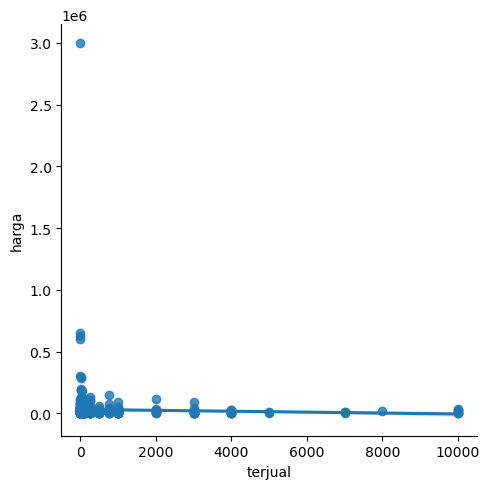

In [311]:
#import library yang dibutuhkan
import seaborn as sns

# lihat bagaimana bentuk dari data itu secara visual untuk menggambarkan
# ini adalah penggambaran sebaran data ditambah dengan regresi linear nya
sns.lmplot(data=df,x='terjual', y='harga')


Datanya terdistorsi sekali karena ada data yang bernilai 3 juta itu. dan outlier lain lain. Kita handling dulu datanya supaya satu data 3juta itu terbuang dan outlier lain juga ikut dihilangkan dari data set.

In [312]:

''' outlier bisa dihitung dengan interquartile range dikali 1,5 ini adalah cara biasa untuk menentukan apakah suatu nilai masuk outlier atau tidak
1,5 kai dari IQR itu akan ditambahkan dan dikurangkan dari q3 dan q1 persis seperti formula dibawah'''
# menghilangkan outlier dengan interquartile range 

# menentukan q1 atau quartil bawah pada kolom harga 
q1 = df['harga'].quantile(0.25)
#menentukan q3 atau quartil atas pada kolom harga
q3 = df['harga'].quantile(0.75)

# rumus interquartil range q3 - q1 digunakan untuk menghitung upper dan lower boundary
iqr = q3-q1

# upper boundary batas atas data itu masih masuk data normal bukan outlier(atas nilai ini adalah outlier)
up_bound = q3 + 1.5*iqr

#lower boundary batas bawah bahwa data itu masih masuk data normal  (bawah nilai ini adalah outlier) 
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 53125.00
Lower Boundary: -17875.00


outlier sudah ditentukan harusnya data minus itu tidak mungkin karena harga terendah pasti 0. jadi kita anggap data ini tak punya data negatif. karena sistem online shop sendiri pada dasarnya tidak mungkin kita menampilkan data negatif pada penjualan jadi tidak perlu kita cek. data upper boundarynya yaitu 53125. jadi data diatas data ini merupakan outlier dan harus kita singkirkan terlebih dahulu dari data set supaya bersih

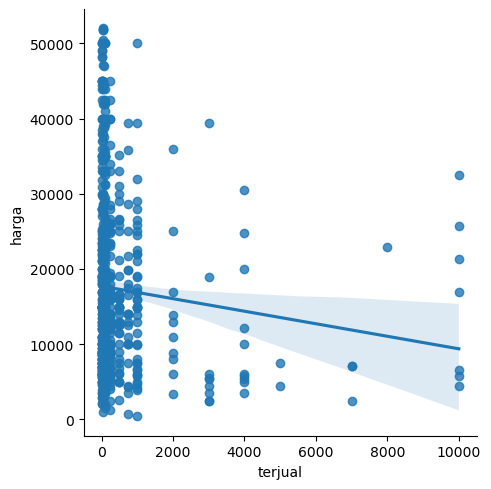

In [313]:
# membuat data frame tanpa outlier dikolom harga
df_harga_bersih = df[df['harga']<= 53125]
#memvisualisasikan bentuk tabel
sns.lmplot(data=df_harga_bersih,x='terjual', y='harga')


Dari data ini kita menyimpulkan garis regresi agak miring sedikit mendekat ke sumbu x yang artinya ada sedikit korelasi negatif. mungkin ini disebabkan oleh adanya outlier pada kolom terjual . maka coba hilangkan lagi outlier di kolom terjual supaya dataset benar benar bersih dari outlier baik dari kolom terjual maupun kolom harga.

In [314]:
# menghilangkan outlier dengan iqr
# definisikan dulu quartil bawah dari dataset kolom terjual
q1_terjual = df['terjual'].quantile(0.25)
# definisikan dulu quartil atas dari dataset kolom terjual

# interrangequartil
q3_terjual = df['terjual'].quantile(0.75)
# menghitung iqr kolom terjual
iqr_terjual = q3_terjual-q1_terjual

#penghitungan upper
up_bound_terjual = q3_terjual + 1.5*iqr_terjual
# penghitungan lower 
low_bound_terjual = q1_terjual - 1.5*iqr_terjual

print(f'Upper Boundary: {up_bound_terjual:.2f}' )
print(f'Lower Boundary: {low_bound_terjual:.2f}')

Upper Boundary: 592.00
Lower Boundary: -320.00


Uper boundary sudah ditentukan sekarang kita bisa membersihkan dataset. Upper boundary ini yang akan kita gunakan karena sama konsepnya seperti harga tidak ada definisi terjual negatif.  

In [315]:
# membuat dataset baru tanpa kehadiran outlier
df_no_outlier = df [(df['harga']<= 53125)&(df['terjual']<= 592 )]
# menampilkan dataset yang telah dikoding
df_no_outlier

,nama_produk,harga,nama_toko,kota,terjual,rating
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40,5.0
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500,5.0
3,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500,4.9
4,Seblak instan komplit / seblak instan murah,5000,ismileusa_id,Kab. Bandung,100,4.7
10,"KERUPUK SEBLAK MENTAH ANEKA WARNA - Matahari, ...",11500,jajanangarut19,Jakarta Selatan,500,4.8
...,...,...,...,...,...,...
797,seblak basreng pedas daun jeruk isi 1kg geram,50000,seblak barokah 07,Kab. Bandung,50,4.7
799,KERUPUK SEBLAK MENTAH ORANGE 250GR,5500,cemilanmentahjakarta,Jakarta Utara,30,5.0
800,kerupuk seblak Rafael 100g,6000,ADDARSNACK,Kab. Cianjur,29,4.9
801,"pangsit segitiga, cipet isi 20 pcs topping bas...",6999,Culametan Food,Kab. Garut,11,5.0


Terlihat output di atas data outlier sudah tak ada sekarang bisa kita tampilkan visualisasi serta garis regresinya

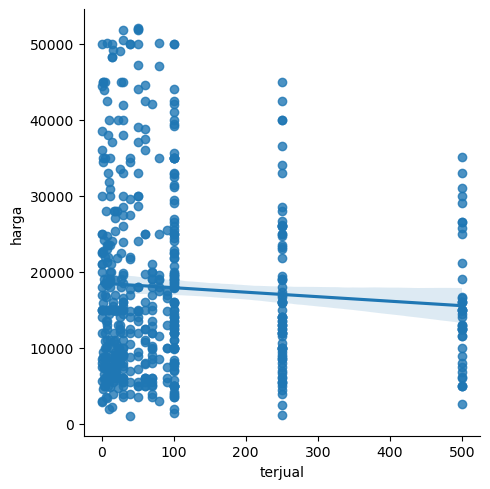

In [316]:
sns.lmplot(data =df_no_outlier ,x='terjual', y='harga')

Bila kita bandingkan dengan 2 figure sebelumnya garis ini cenderung mendekati garis lurus dengan kemiringan sedikit sekali. Ini menunjukkan bahwa sebenarnya data ini tidak terpengaruh satu sama lain. jadi memang random saja. Untuk bukti lebih lanjut kita harus menghitung secara perhitungan statistik.

Kita menggunakan test spearmann untuk data set ini. untuk membandingkan pada kolom harga dan terjual apakah ada korelasinya. Mengapa Spearman korelasi yang kita pakai. Data kita masih mengandung outlier meskipun sudah dibersihkan. hal ini ditunjukkan dengan adanya masih banyaknya dot pada angka 500 maupun 50000 (angka ini adalah boundary atas dari kedua data). Hasil dari korelasi spearman tidak terpengaruh oleh outlier.

In [317]:
# kode untuk korelasi spearman menggunakan scipy library
corr_rho, pval_s = stats.spearmanr(df_no_outlier['harga'], df_no_outlier['terjual'])

# mengeluarkan hasilnya
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.00, p-value: 0.9419836308932296


Terbukti secara statistik bahwa korelasi antara harga dan unit terjual tidak ada. Ini dibuktikan dengan rho corelation 0 dan signifikan value 0,94. jadi ketika rho corelation 0 itu adalah tak ada korelasi. ini didukung oleh p-value 94%. yang mana jika kita mengambil signifikansi level itu 95% maka derajat eror kita adalah 5%. nah jika p-value dibandingkan dengan derajat eror (0,94 > 0,05) maka p value itu jauh lebih tinggi. Ini berarti kita tidak bisa menolak h0. h0 disini adalah harga dan unit terjual itu tidak berkorelasi. Jadi kita gagal menolak h0 atau harga dan unit terjual tidak berkorelasi. 

Bisnis Insight. 

Total terjual dan harga tidak terkorelasi. jadi saran keputusan bisnis untuk startup seblak online kita adalah kita bisa mengambil segmen pasar manapun sesuai dengan keinginan kita. karena baik pasar premium atau pasar biasa tidak berkorelasi signifikan. Jika kita ingin cepat mencapai angka 10 juta maka pasar premium lebih dipilih. Meskipun pada pasar segmen rendah bisa juga tercapai namun mempunyai kelemahan yaitu pencapaiannya jauh lebih membutuhkan penjualan yang lebih banyak.  

# Kesimpulan

Kita harus kumpulkan kesimpulan apa yang kita dapat setelah melakukan data analisis ini dan insight apa yang bisa dapatkan serta mungkin saran yang harus dilakukan untuk bisnis jualan seblak online ini. 
1. Median harga seblak di angka 15000 rupiah sedangkan rata-rata harga jauh di angka 30000. Jadi bisa berasumsi tipikal harga produk seblak itu berada di angka 15000 an. 
2. Median produk terjual di angka 80, namun setelah kita asumsikan data ini normal dan kita melakukan uji test kita bisa mendapatkan hasil bahwa kita yakin dengan derajat signifikan 95% bahwa kita bisa menjual seblak 400 unit per bulan karena rentang produk terjual masih di angka 350 - 540. 
3. Rating rata2 4,4 dan median 4,9. Untuk memastikan bahwa kita mencapai target 10 juta, maka ada target untuk kita untuk mendapat bintang 5 atau mempertahankan 4,9. karena kebanyakan data penjual berkumpul di titik 4,9. 
4. Harga di jabodetabek dan luar jabodetabek berbeda karena kita tinggal di jabodetabek sebaiknya kita fokus untuk menggarap pasar lokal dulu dan mengambil supplier kita dari jabodetabek saja untuk memastikan bahwa layanan kita cepat sampai. 
5. Produk terjual tidak terpengaruh harga sama sekali. Bisa kita mengambil segmen manapun tanpa peduli potensi pasar, karena potensi pasar sama-sama memungkinkan. 


Untuk mencapai 10 juta dalam waktu 2 bulan atau lebih cepat maka disini saya bisa memberikan keputusan bahwa kita bisa mengambil segmen pasar yang premium. Ini dikarenakan pasar tidak terpengaruh sekali oleh harga jual. Jadi kita bisa berfokus kepada produk dan meningkatkan pelayanan kita. Sebagai tambahan juga besarnya profit per unit itu akan kita gunakan untuk menutupi biaya iklan kita di awal. 

Kita sangat yakin dengan mengambil rata2 penjualan 400 unit berdasarkan confidence interval 95% maka target kita 10 juta itu akan bisa dicapai dalam waktu 1 bulan. Hitugannya adalah dengan asumsi kita mengambil segmen harga premium yaitu 25000 dan dikali dengan 400 unit maka hasilnya 10 juta (Unit terjual masih masuk rentang rata2 hasil analisis tes).

 Karena kita berfokus di jabodetabek dan bukti pasar menunjukkan bahwa harga di jabodetabek memang lebih mahal dibandingkan daerah selain jabodetabek. Seharusnya kita bisa fokus untuk targetting iklan di area jabodetabek. Ditambah lagi Jabodetabek sendiri adalah awal dari kita merintis serta cocok dengan profil segmen kita yang cenderung premium.
  
Kita perlu untuk investasi di awal yaitu biaya iklan karena berdasarkan data median produk terjual, lebih dari 50% penjual hanya mampu menjual produknya sekitar plus minus 80 unit. Jadi biaya iklan di awal adalah wajib untuk usaha kita ini karena kita harus memenangkan persaingan dengan menampilkan iklan kita di halaman pertama tokopedia. Jadi dengan pengambilan segmen premium dan fokus iklan di area target kita sangat mungkin sekali kita meraih 10 juta dalam 2bulan.  

In [ ]:
df.to_csv("C:\Users\asanm\Hacktiv8\Phase0\milestone\p0-ftds035-rmt-m1-asanmaulana\maulana_achsan_df.csv", index=False)
